### Import the dataframes created during the Data Wrangling process.

In [29]:
# import dataframe with original full-length reviews
import pandas as pd
reviews_full = reviews = pd.read_pickle('drugsCom_reviews')

In [30]:
# import dataframe with cleaned reviews
reviews_clean = reviews = pd.read_pickle('drugsCom_reviews_clean')

In [31]:
# import sparse matrix
from scipy.sparse import load_npz

reviews_sparse = load_npz('reviews_csr.npz')

# convert back to dataframe
reviews_matrix = pd.DataFrame(reviews_sparse.todense())

In [32]:
# import column headers for dataframe
import pickle

pickle_in = open('list.pickle', 'rb')
reviews_columns = pickle.load(pickle_in)

# add column headers back to dataframe
reviews_matrix.columns = reviews_columns

In [33]:
# add ratings back to the matrix to allow filtering
reviews_matrix['rating'] = reviews_full['rating']

# Do any ratings tend to have longer reviews?

Both character count and word count were used to compare review lengths for each rating score. Box plots were created and displayed along with the median character counts for each rating. 

Review lengths tended to increase slightly from rating 1 to rating 8, then decrease for ratings 9 and 10. Ratings 1 and 10 tended to have the shortest reviews. But there isn't a large difference between what we're considering 'good reviews' (rating 8 and up) and the others.

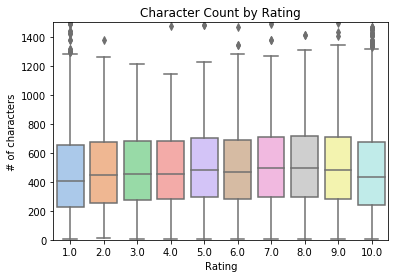

'Character Count by Rating'

,character_count
rating,
1.0,404
10.0,434
2.0,448
3.0,454
4.0,457
6.0,468
5.0,480
9.0,483
8.0,495


In [34]:
# compare character count by rating

import seaborn as sns
import matplotlib.pyplot as plt

# count number of characters per review
reviews_full['character_count'] = reviews_full['review'].str.len()

# create box plot for character count by rating
sns.set_palette('pastel')

a = sns.boxplot(x='rating',
            y='character_count',
            data=reviews_full)

plt.title('Character Count by Rating')
plt.ylabel('# of characters')
plt.xlabel('Rating')
plt.ylim(0,1500)
plt.show(a)

# display median character counts
character_count_median = reviews_full.groupby('rating', axis=0).agg({'character_count':'median'})
display('Character Count by Rating', character_count_median.sort_values('character_count'))

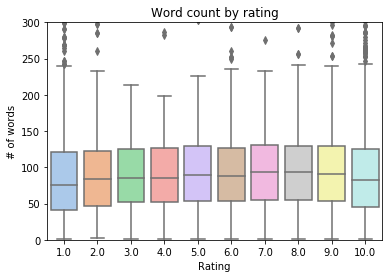

'Word Count by Rating'

,word_count
rating,
1.0,76
10.0,82
2.0,84
3.0,85
4.0,85
6.0,88
5.0,90
9.0,91
7.0,93


In [35]:
# compare word count by rating
reviews_full['word_count'] = reviews_full['review'].str.count(' ') + 1

# create box plots for word count by rating
b = sns.boxplot(x='rating',
                y='word_count',
                data=reviews_full)

plt.title('Word count by rating')
plt.ylabel('# of words')
plt.xlabel('Rating')
plt.ylim(0,300)
plt.show(b)

# display median word counts
word_count_median = reviews_full.groupby('rating', axis=0).agg({'word_count':'median'})
display('Word Count by Rating', word_count_median.sort_values('word_count'))

# What drugs tend to have higher or lower ratings?

In [36]:
# only include drug names that appear 50 or more times
total_drugName = reviews_full.drugName.value_counts()
drugs_50 = total_drugName[total_drugName >= 50].index

In [65]:
# calculate median rating for each drug
drug_median = reviews_full[reviews_full['drugName'].isin(drugs_50)].groupby('drugName', axis=0).agg({'rating':'median'})

# sort and list drugs with a median rating of 8 or greater
drug_top = drug_median[drug_median['rating'] >= 8.0].sort_values('rating', ascending=False)
display(drug_top[0:11])

,rating
drugName,
Relpax,10.0
Cialis,10.0
Diazepam,10.0
Polyethylene glycol 3350,10.0
Propofol,10.0
Propranolol,10.0
Cyproheptadine,10.0
Klonopin,10.0
Cobicistat / elvitegravir / emtricitabine / tenofovir,10.0


In [66]:
# sort and list drugs with a median rating less than 8
drug_bottom = drug_median[drug_median['rating'] < 8.0].sort_values('rating', ascending=False)
display(drug_bottom[0:11])

,rating
drugName,
Xarelto,7.5
Levora,7.5
Intuniv,7.5
Abreva,7.0
Keppra,7.0
Microgestin Fe 1.5 / 30,7.0
Metoprolol,7.0
Methocarbamol,7.0
Lupron Depot,7.0


# What conditions tend to have higher or lower ratings?

In [41]:
# only include conditions that appear 50 or more times
total_conditions = reviews_full.condition.value_counts()
conditions_50 = total_conditions[total_conditions >= 50].index

In [42]:
# calculate median rating for each condition
condition_median = reviews_full[reviews_full['condition'].isin(conditions_50)].groupby('condition', axis=0).agg({'rating':'median'})

# sort and list conditions with a median rating of 8 or greater
condition_top = condition_median[condition_median['rating'] >= 8.0].sort_values('rating', ascending=False)
display(condition_top)

,rating
condition,
Head Lice,10.0
Cluster Headaches,10.0
Headache,10.0
Rhinitis,10.0
HIV Infection,10.0
...,...
Pneumonia,8.0
Plaque Psoriasis,8.0
Peripheral Neuropathy,8.0


In [43]:
# sort and list conditions with a median rating less than 8
condition_bottom = condition_median[condition_median['rating'] < 8.0].sort_values('rating', ascending=False)
display(condition_bottom)

,rating
condition,
Deep Vein Thrombosis,7.0
Menstrual Disorders,7.0
Endometriosis,7.0
"Glaucoma, Open Angle",7.0
Birth Control,7.0
Benign Prostatic Hyperplasia,7.0
High Blood Pressure,7.0
Bacterial Infection,7.0
Autism,7.0


# What are the most frequent words for each rating?

Bar graphs were created and displayed along with a list of the top 10 most used words for each rating.

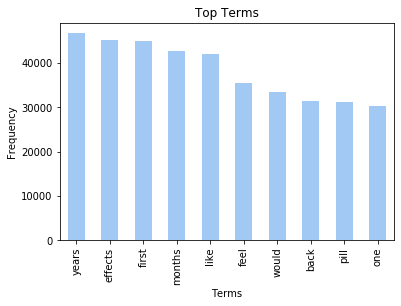

years      46678
effects    45175
first      45032
months     42718
like       41939
feel       35511
would      33315
back       31461
pill       31096
one        30348
dtype: int64

In [44]:
# count top 10 terms across all ratings
top_terms = reviews_matrix.drop('rating', 1).sum().nlargest(10)

# plot bar graph of to 10 terms
_ = top_terms.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# display list of top 10
display(top_terms)

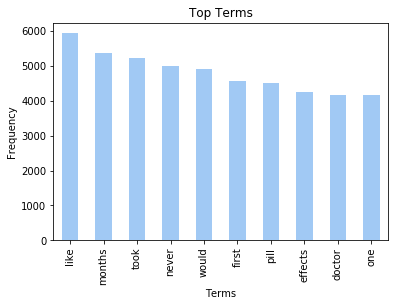

like       5937
months     5364
took       5220
never      4984
would      4897
first      4564
pill       4514
effects    4250
doctor     4171
one        4170
dtype: int64

In [45]:
# Count top 10 terms for 1.0 ratings
reviews_1 = reviews_matrix[reviews_matrix['rating'] == 1.0]

# Exclude the rating from the count
reviews_1 = reviews_1.drop('rating', 1)
word_count_1 = reviews_1.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_1.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_1)

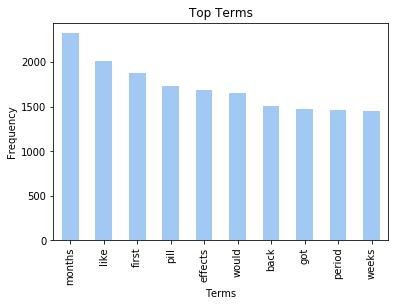

months     2324
like       2011
first      1878
pill       1732
effects    1691
would      1655
back       1504
got        1475
period     1457
weeks      1454
dtype: int64

In [46]:
# Count top 10 terms for 2.0 ratings
reviews_2 = reviews_matrix[reviews_matrix['rating'] == 2.0]

# Exclude the rating from the count
reviews_2 = reviews_2.drop('rating', 1)
word_count_2 = reviews_2.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_2.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_2)

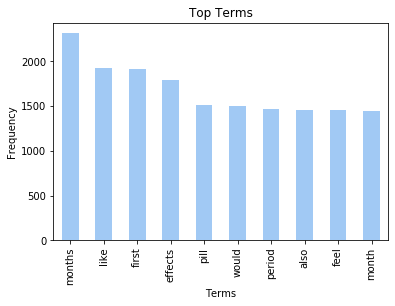

months     2313
like       1924
first      1914
effects    1789
pill       1513
would      1505
period     1466
also       1454
feel       1450
month      1440
dtype: int64

In [47]:
# Count top 10 terms for 3.0 ratings
reviews_3 = reviews_matrix[reviews_matrix['rating'] == 3.0]

# Exclude the rating from the count
reviews_3 = reviews_3.drop('rating', 1)
word_count_3 = reviews_3.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_3.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_3)

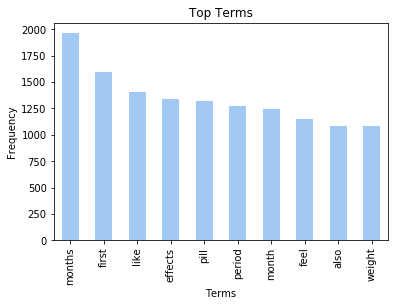

months     1964
first      1592
like       1411
effects    1338
pill       1319
period     1278
month      1246
feel       1155
also       1080
weight     1080
dtype: int64

In [48]:
# Count top 10 terms for 4.0 ratings
reviews_4 = reviews_matrix[reviews_matrix['rating'] == 4.0]

# Exclude the rating from the count
reviews_4 = reviews_4.drop('rating', 1)
word_count_4 = reviews_4.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_4.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_4)

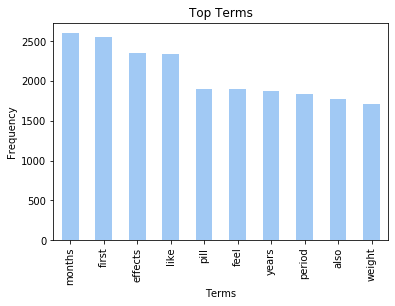

months     2600
first      2552
effects    2349
like       2336
pill       1904
feel       1897
years      1880
period     1838
also       1769
weight     1717
dtype: int64

In [49]:
# Count top 10 terms for 5.0 ratings
reviews_5 = reviews_matrix[reviews_matrix['rating'] == 5.0]

# Exclude the rating from the count
reviews_5 = reviews_5.drop('rating', 1)
word_count_5 = reviews_5.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_5.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_5)

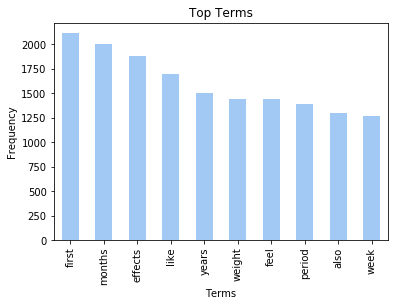

first      2114
months     2005
effects    1883
like       1698
years      1504
weight     1447
feel       1443
period     1390
also       1299
week       1273
dtype: int64

In [50]:
# Count top 10 terms for 6.0 ratings
reviews_6 = reviews_matrix[reviews_matrix['rating'] == 6.0]

# Exclude the rating from the count
reviews_6 = reviews_6.drop('rating', 1)
word_count_6 = reviews_6.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_6.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_6)

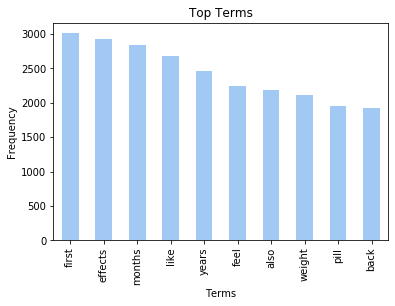

first      3011
effects    2932
months     2840
like       2673
years      2468
feel       2245
also       2186
weight     2109
pill       1952
back       1922
dtype: int64

In [51]:
# Count top 10 terms for 7.0 ratings
reviews_7 = reviews_matrix[reviews_matrix['rating'] == 7.0]

# Exclude the rating from the count
reviews_7 = reviews_7.drop('rating', 1)
word_count_7 = reviews_7.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_7.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_7)

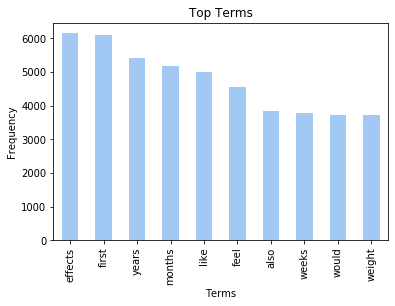

effects    6156
first      6092
years      5431
months     5168
like       5017
feel       4559
also       3850
weeks      3775
would      3739
weight     3719
dtype: int64

In [52]:
# Count top 10 terms for 8.0 ratings
reviews_8 = reviews_matrix[reviews_matrix['rating'] == 8.0]

# Exclude the rating from the count
reviews_8 = reviews_8.drop('rating', 1)
word_count_8 = reviews_8.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_8.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_8)

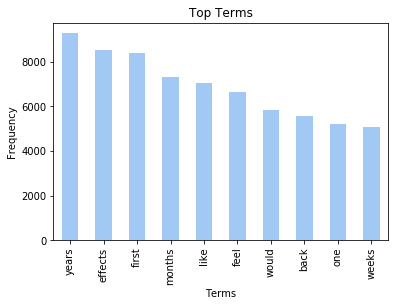

years      9280
effects    8537
first      8377
months     7318
like       7057
feel       6659
would      5841
back       5559
one        5234
weeks      5060
dtype: int64

In [53]:
# Count top 10 terms for 9.0 ratings
reviews_9 = reviews_matrix[reviews_matrix['rating'] == 9.0]

# Exclude the rating from the count
reviews_9 = reviews_9.drop('rating', 1)
word_count_9 = reviews_9.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_9.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_9)

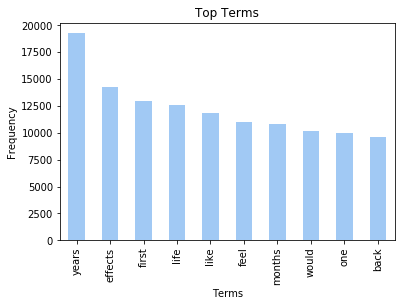

years      19256
effects    14250
first      12938
life       12576
like       11875
feel       10957
months     10822
would      10165
one         9956
back        9565
dtype: int64

In [54]:
# Count top 10 terms for 10.0 ratings
reviews_10 = reviews_matrix[reviews_matrix['rating'] == 10.0]

# Exclude the rating from the count
reviews_10 = reviews_10.drop('rating', 1)
word_count_10 = reviews_10.sum().nlargest(10)

# Plot bar graph of to 10 terms
_ = word_count_10.plot(kind='bar')
_ = plt.xlabel('Terms')
_ = plt.ylabel('Frequency')
_ = plt.title('Top Terms')
plt.show()

# Display list of top 10
display(word_count_10)

## What words are most used for each rating?

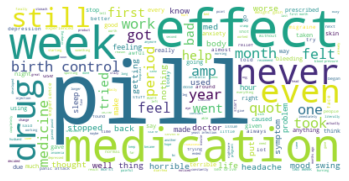

In [55]:
# create word cloud for 1.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 1.0].review)

wordcloud1 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

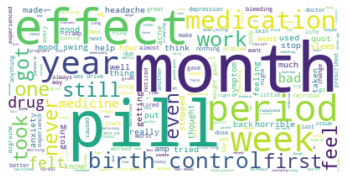

In [56]:
# create word cloud for 2.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 2.0].review)

wordcloud2 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

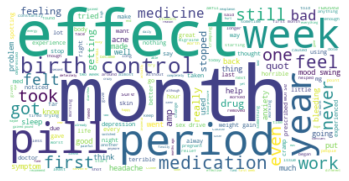

In [57]:
# create word cloud for 3.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 3.0].review)

wordcloud3 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

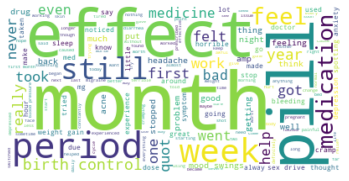

In [58]:
# create word cloud for 4.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 4.0].review)

wordcloud4 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

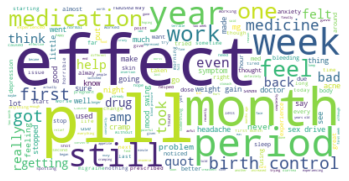

In [59]:
# create word cloud for 5.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 5.0].review)

wordcloud5 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
plt.show()

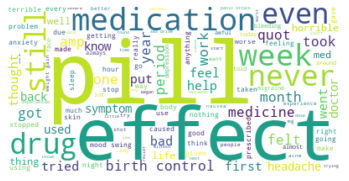

In [60]:
# create word cloud for 6.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 1.0].review)

wordcloud6 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud6, interpolation='bilinear')
plt.axis('off')
plt.show()

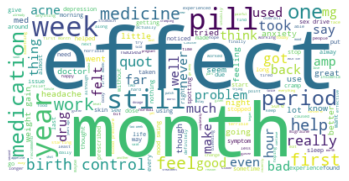

In [61]:
# create word cloud for 7.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 7.0].review)

wordcloud7 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis('off')
plt.show()

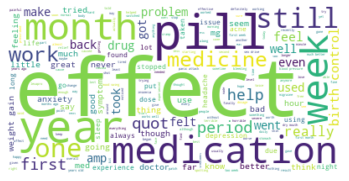

In [62]:
# create word cloud for 8.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 8.0].review)

wordcloud8 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud8, interpolation='bilinear')
plt.axis('off')
plt.show()

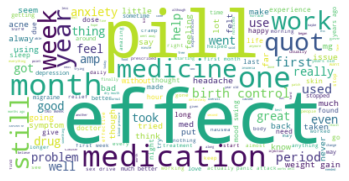

In [63]:
# create word cloud for 9.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 9.0].review)

wordcloud9 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud9, interpolation='bilinear')
plt.axis('off')
plt.show()

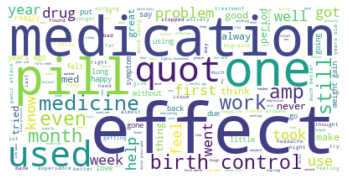

In [64]:
# create word cloud for 10.0 ratings
from wordcloud import WordCloud

text = ' '.join(review for review in reviews_clean[reviews_clean['rating'] == 10.0].review)

wordcloud10 = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud10, interpolation='bilinear')
plt.axis('off')
plt.show()